In [4]:
import matplotlib.pyplot as plt
import random as rnd

In [5]:
def generateRandomVertex(n, rang):
    verts = []
    ekis = 0
    ye = 0
    for i in range(0,n):
        
        x2 = rnd.randrange(rang)
        y2 = rnd.randrange(rang)
        
        if (i == 0):      
            x1 = rnd.randrange(rang)
            y1 = rnd.randrange(rang)
                        
            verts.append(( (x1,y1) , (x2,y2) ))
        else:
            verts.append(( (ekis,ye) , (x2,y2) ))     
        
        ekis = x2
        ye = y2 
    return verts

In [6]:
def plotDcel(verts):
    
    ax = plt.axes()
    
    for i in verts:
        
        x = ((i[0])[0], (i[1])[0])
        y = ((i[0])[1], (i[1])[1])
        
        dx = (i[1])[0] - (i[0])[0]
        dy = (i[1])[1] - (i[0])[1]

        dxT = (i[0])[0] - (i[1])[0]
        dyT = (i[0])[1] - (i[1])[1]
        
        ax.arrow((i[0])[0], (i[0])[1], dx, dy, head_width=0.09, head_length=0.06, fc='k', ec='k', length_includes_head=True)
        ax.arrow((i[1])[0], (i[1])[1], dxT, dyT, head_width=0.09, head_length=0.06, fc='k', ec='k', length_includes_head=True)
        plt.plot(x, y, 'o')
    plt.show()

In [7]:
class Vertex:
    def __init__ (self, vertex_id, coordinates):
        self.id = vertex_id
        self.coordinates = coordinates 
        
    def __repr__(self):
        return f"{self.coordinates}"
        
class Edge:
    def __init__(self, he1, he2):
        self.halfEdge1 = he1
        self.halfEdge2 = he2
        
    def __repr__(self):    
        return f"""
h1: {self.halfEdge1}
h2: {self.halfEdge2}"""
        
class HalfEdge:
    def __init__(self, id, v1, v2):
        self.id = id
        self.twin = None
        self.origin = v1
        self.destination = v2
        self.prev = None
        self.next= None
     
    def __repr__(self):    
        return f"""
    id: {self.id} 
    origin: {self.origin} 
    destination: {self.destination} 
    prev: {self.prev} 
    next: {self.next}
    """

        
class Face:
    def __init__ (self, outerEdge, innerEdge):
        self.halfEdge1 = outerEdge
        self.halfEdge2 = innerEdge if innerEdge != None else None  

In [8]:
class Dcel:
    def __init__(self):
        self.vertices = []
        self.edges = []
        self.faces = []
        
    def __repr__(self):
        return f"""Vertices: {self.vertices}\n\nEdges: {self.edges}"""  
    
    def build_dcel(self, verts):
        """BUILDS VERTEX"""
        count = 0
        for i in verts:
            self.vertices.append(Vertex(count, (i[0],i[1])))
            count += 1
            
        """BUILDS EDGES"""
        count = 0
        for i in self.vertices:
            he1 = HalfEdge(count,i.coordinates[0], i.coordinates[1])
            he2 = HalfEdge(count+1,i.coordinates[1], i.coordinates[0])
            he1.twin = he2
            he2.twin = he1
            self.edges.append(Edge(he1,he2))
            count += 2
    

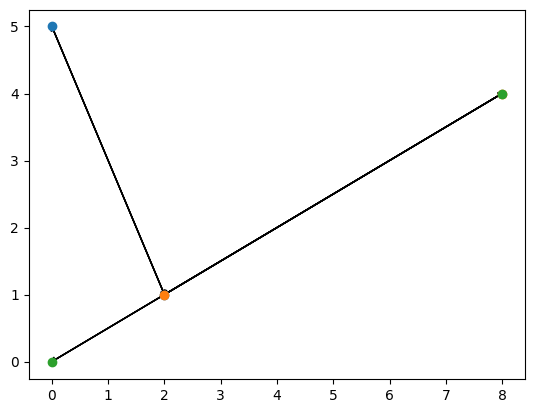

In [89]:
"""PLOT DCEL"""

verts = generateRandomVertex(3, 10)
plotDcel(verts)

In [93]:
"""BUILD DCEL"""
Dcel1 = Dcel()
Dcel1.build_dcel(verts)

print(Dcel1) 

Vertices: [((0, 5), (2, 1)), ((2, 1), (8, 4)), ((8, 4), (0, 0))]

Edges: [
h1: 
    id: 0 
    origin: (0, 5) 
    destination: (2, 1) 
    prev: None 
    next: None
    
h2: 
    id: 1 
    origin: (2, 1) 
    destination: (0, 5) 
    prev: None 
    next: None
    , 
h1: 
    id: 2 
    origin: (2, 1) 
    destination: (8, 4) 
    prev: None 
    next: None
    
h2: 
    id: 3 
    origin: (8, 4) 
    destination: (2, 1) 
    prev: None 
    next: None
    , 
h1: 
    id: 4 
    origin: (8, 4) 
    destination: (0, 0) 
    prev: None 
    next: None
    
h2: 
    id: 5 
    origin: (0, 0) 
    destination: (8, 4) 
    prev: None 
    next: None
    ]
